<a href="https://colab.research.google.com/github/Harman1107/Major_Project_Parkinson/blob/DevHarman/Models_of_Major_Project_using_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [110]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [82]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('./eeg_dataset(2).csv')

In [83]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Status
0,-0.018572,-0.016547,-0.012220,-0.026548,-0.015249,-0.012315,-0.005031,-0.014535,-0.012051,-0.009093,...,-0.011194,-0.010850,-0.009106,-0.014477,-0.010789,-0.008840,-0.010232,-0.007059,-0.009808,0
1,-0.015544,-0.007960,-0.009142,-0.004414,0.002998,-0.005721,-0.001822,0.005940,-0.007404,0.002348,...,-0.001600,0.000081,-0.002471,-0.003974,-0.014098,-0.005188,-0.014829,-0.000739,-0.002891,0
2,-0.013005,-0.014493,-0.005920,-0.007964,-0.004377,-0.002638,-0.010482,-0.003170,-0.000205,-0.001762,...,-0.008962,-0.005190,-0.004611,-0.013489,-0.006619,-0.014944,-0.010761,-0.004509,0.004039,1
3,-0.009478,-0.013750,-0.005022,-0.013594,-0.005313,-0.007160,-0.002833,-0.003069,-0.001594,0.001301,...,-0.002374,-0.001580,-0.007699,-0.011463,-0.005926,-0.008118,-0.002620,-0.007471,-0.003515,0
4,-0.002619,-0.006864,-0.006059,-0.013748,-0.001356,-0.009366,-0.009207,0.001396,-0.001500,-0.002128,...,-0.004904,-0.006360,-0.004691,-0.008551,-0.005941,-0.002934,0.007832,0.000120,-0.004394,1


In [84]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(30, 33)

In [85]:
for column in parkinsons_data.columns:
    if parkinsons_data[column].dtype == 'object':
        parkinsons_data = parkinsons_data.drop(column, axis=1)

In [86]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fp1     30 non-null     float64
 1   AF3     30 non-null     float64
 2   F7      30 non-null     float64
 3   F3      30 non-null     float64
 4   FC1     30 non-null     float64
 5   FC5     30 non-null     float64
 6   T7      30 non-null     float64
 7   C3      30 non-null     float64
 8   CP1     30 non-null     float64
 9   CP5     30 non-null     float64
 10  P7      30 non-null     float64
 11  P3      30 non-null     float64
 12  Pz      30 non-null     float64
 13  PO3     30 non-null     float64
 14  O1      30 non-null     float64
 15  Oz      30 non-null     float64
 16  O2      30 non-null     float64
 17  PO4     30 non-null     float64
 18  P4      30 non-null     float64
 19  P8      30 non-null     float64
 20  CP6     30 non-null     float64
 21  CP2     30 non-null     float64
 22  C4  

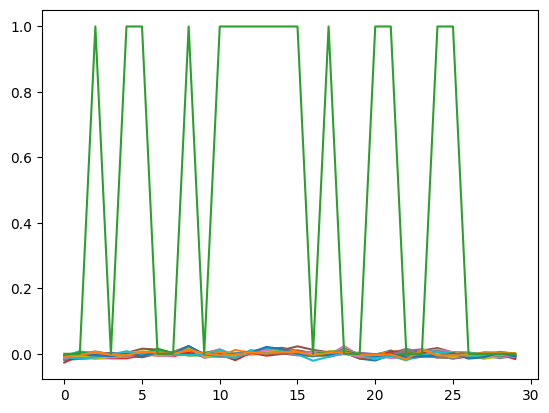

In [87]:
plt.plot(parkinsons_data)
plt.show()
    

In [88]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

Fp1       0
AF3       0
F7        0
F3        0
FC1       0
FC5       0
T7        0
C3        0
CP1       0
CP5       0
P7        0
P3        0
Pz        0
PO3       0
O1        0
Oz        0
O2        0
PO4       0
P4        0
P8        0
CP6       0
CP2       0
C4        0
T8        0
FC6       0
FC2       0
F4        0
F8        0
AF4       0
Fp2       0
Fz        0
Cz        0
Status    0
dtype: int64

In [89]:
# getting some statistical measures about the data
parkinsons_data.describe()

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Status
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.004994,-0.003704,-0.002668,-0.003132,-0.001926,-0.002208,-0.001677,0.000912,-0.000057,0.000652,...,-0.003825,-0.000303,-0.003240,-0.005559,-0.002788,-0.002705,-0.004137,-0.001179,0.000009,0.500000
std,0.008670,0.008220,0.007316,0.009168,0.006368,0.006689,0.007003,0.006910,0.005786,0.005757,...,0.006273,0.007041,0.006344,0.007547,0.008073,0.008741,0.008217,0.008670,0.006238,0.508548
min,-0.020594,-0.016670,-0.013366,-0.026548,-0.015249,-0.014222,-0.012017,-0.014535,-0.012051,-0.014933,...,-0.019470,-0.012326,-0.015042,-0.014477,-0.014098,-0.020858,-0.021175,-0.014712,-0.016635,0.000000
25%,-0.010199,-0.009709,-0.006476,-0.007839,-0.005240,-0.007125,-0.005165,-0.002941,-0.003429,-0.002113,...,-0.007168,-0.005241,-0.007603,-0.010535,-0.007421,-0.007941,-0.009177,-0.007040,-0.004145,0.000000
50%,-0.005218,-0.003991,-0.003840,-0.004676,-0.002688,-0.002646,-0.002397,0.001130,0.000055,0.001016,...,-0.003639,-0.001365,-0.004221,-0.008039,-0.005406,-0.002909,-0.003355,-0.001996,-0.000147,0.500000
75%,-0.000216,0.001983,0.001339,0.001907,0.000830,0.002378,-0.000782,0.004653,0.004441,0.004066,...,-0.000946,0.003190,0.000564,-0.002504,0.000917,0.000969,0.000127,0.000872,0.004620,1.000000
max,0.018389,0.016121,0.021652,0.017025,0.021726,0.010559,0.024101,0.023857,0.012009,0.011203,...,0.007445,0.018850,0.013796,0.017983,0.018864,0.018009,0.011572,0.023451,0.012831,1.000000


In [90]:
# distribution of target Variable
parkinsons_data['Status'].value_counts()

0    15
1    15
Name: Status, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [91]:
# grouping the data based on the target variable
parkinsons_data.groupby('Status').mean()

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
Status,,,,,,,,,,,,,,,,,,,,,
0,-0.006065,-0.005119,-0.005552,-0.004754,-0.003755,-0.005371,-0.001420,-0.001518,-0.001478,-0.001470,...,-0.001336,-0.003406,-0.000142,-0.004426,-0.007029,-0.002464,-0.003078,-0.005876,-0.004158,-0.000967
1,-0.003923,-0.002290,0.000217,-0.001511,-0.000097,0.000954,-0.001934,0.003343,0.001364,0.002774,...,0.000070,-0.004244,-0.000465,-0.002055,-0.004090,-0.003111,-0.002332,-0.002398,0.001801,0.000986


Data Pre-Processing

Separating the features & Target

In [92]:
X = parkinsons_data.drop(columns=['Status'], axis=1)
Y = parkinsons_data['Status']

In [93]:
print(X)

         Fp1       AF3        F7        F3       FC1       FC5        T7  \
0  -0.018572 -0.016547 -0.012220 -0.026548 -0.015249 -0.012315 -0.005031   
1  -0.015544 -0.007960 -0.009142 -0.004414  0.002998 -0.005721 -0.001822   
2  -0.013005 -0.014493 -0.005920 -0.007964 -0.004377 -0.002638 -0.010482   
3  -0.009478 -0.013750 -0.005022 -0.013594 -0.005313 -0.007160 -0.002833   
4  -0.002619 -0.006864 -0.006059 -0.013748 -0.001356 -0.009366 -0.009207   
5  -0.001396 -0.008208  0.003504 -0.004938  0.001098  0.001427 -0.002362   
6   0.000898  0.004334  0.001360  0.007549 -0.000185 -0.003715 -0.000786   
7  -0.003301 -0.004895  0.002515  0.001054 -0.002179  0.001243 -0.001695   
8  -0.001712 -0.003524  0.021652  0.008711  0.021726  0.003764  0.012339   
9  -0.001337  0.000136 -0.001391 -0.005588 -0.003039 -0.007876 -0.002552   
10 -0.008225 -0.009242  0.001276 -0.006607  0.001172  0.005451  0.008099   
11 -0.007569  0.011903 -0.003063 -0.003499 -0.002726 -0.005191 -0.001305   
12  0.000158

In [94]:
print(Y)

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    0
17    1
18    0
19    0
20    1
21    1
22    0
23    0
24    1
25    1
26    0
27    0
28    0
29    0
Name: Status, dtype: int64


Splitting the data to training data & Test data

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.233, random_state=28)

In [96]:
print(X.shape, X_train.shape, X_test.shape)

(30, 32) (23, 32) (7, 32)


Data Standardization

In [97]:
scaler = StandardScaler()

In [98]:
scaler.fit(X_train)

StandardScaler()

In [99]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [100]:
# print(X_train)

Model Training

Support Vector Machine Model Using Different Kernel Values and Confusion Matrix

Accuracy score of training data using Kernel Value :-  linear  :  1.0 



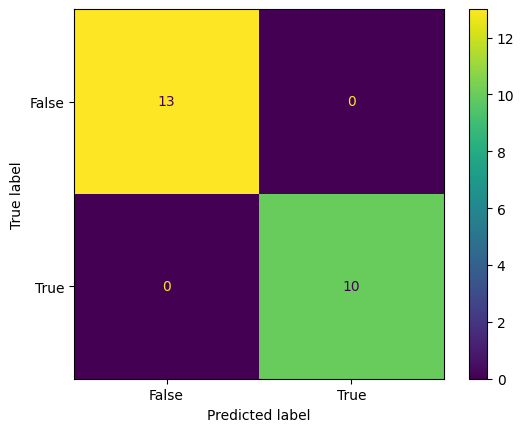

Accuracy score of training data using Kernel Value :-  poly  :  0.6521739130434783 



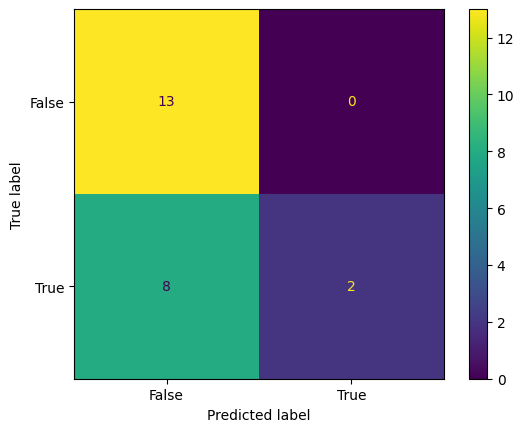

Accuracy score of training data using Kernel Value :-  rbf  :  0.8695652173913043 



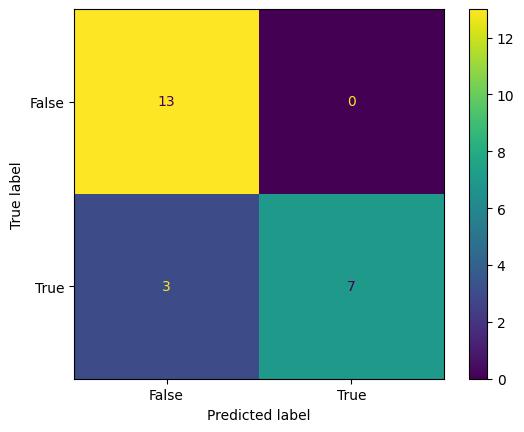

Accuracy score of training data using Kernel Value :-  sigmoid  :  0.6521739130434783 



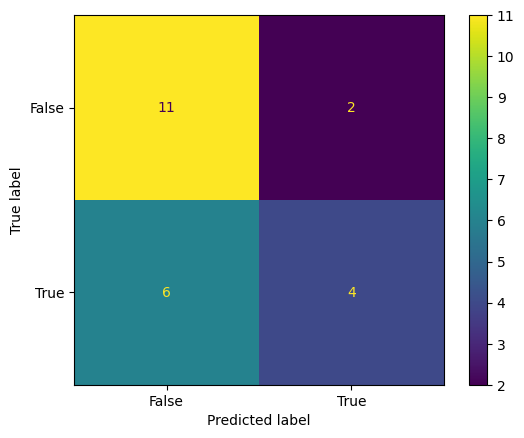

Accuracy score of training data using RF is :-  1.0
Accuracy score of training data using GNB is :-  0.6956521739130435
Accuracy score of training data using XGB is :-  0.6521739130434783


In [101]:
kernelValues = ['linear', 'poly','rbf', 'sigmoid']
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
model_GNB = GaussianNB()
model_XGB = xgb.XGBClassifier()
for v in kernelValues:
    model = svm.SVC(kernel=v)
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    confusion_matrix =  metrics.confusion_matrix(Y_train, X_train_prediction)
    print('Accuracy score of training data using Kernel Value :- ', v," : ", training_data_accuracy,"\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    # sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='gist_heat', cbar=True)
    cm_display.plot()
    plt.show()

model_RF.fit(X_train,Y_train)
model_GNB.fit(X_train, Y_train)
model_XGB.fit(X_train, Y_train)
x_pred_xgb = model.predict(X_train)
x_pred_rf = model_RF.predict(X_train)
x_pred_gnb = model_GNB.predict(X_train)
accuracy_rf = accuracy_score(Y_train, x_pred_rf)
accuracy_gnb = accuracy_score(Y_train, x_pred_gnb)
accuracy_xgb = accuracy_score(Y_train, x_pred_xgb)
print('Accuracy score of training data using RF is :- ', accuracy_rf )
print('Accuracy score of training data using GNB is :- ', accuracy_gnb )
print('Accuracy score of training data using XGB is :- ', accuracy_xgb )



In [102]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='sigmoid')

Model Evaluation

Accuracy Score

In [103]:
# accuracy score on training data
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
confusion_matrix =  metrics.confusion_matrix(Y_train, X_train_prediction)

Accuracy score of training data :  0.6521739130434783


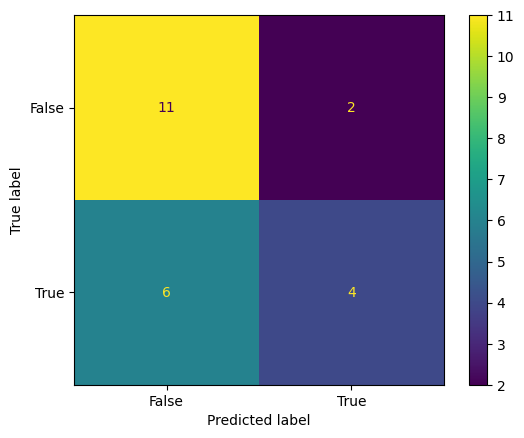

In [104]:
print('Accuracy score of training data : ', training_data_accuracy)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [105]:
# accuracy score on training data

# RNN model 

In [106]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [107]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [108]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [109]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7576 - accuracy: 0.5217
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 0.7187 - accuracy: 0.5217
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6934 - accuracy: 0.5217
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6731 - accuracy: 0.5217
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6558 - accuracy: 0.5217
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6404 - accuracy: 0.5217
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6264 - accuracy: 0.5652
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6135 - accuracy: 0.6087
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6013 - accuracy: 0.6087
Epoch 10/10
1/1 [==============================] - 0s 361ms/step - loss: 0.9186 - accuracy: 0.1429
Test Loss: 0.9185654520988464


In [111]:
# Make predictions on the test set
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Calculate the F1 score
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)

# Calculate the precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Calculate the recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("MSE:", mse)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print("RMSE:", rmse)
# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("MAE:", mae)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
print("MAPE:", mape)

1/1 [==============================] - 0s 191ms/step
F1 Score: 0.25
Precision: 0.3333333333333333
Recall: 0.2
MSE: 0.8571428571428571
RMSE: 0.9258200997725514
MAE: 0.8571428571428571
MAPE: inf
